
# Picture notebook!

In [1]:
using Plots
using DelimitedFiles

In [2]:
function avg(AU, dims=1)
    sum(AU,dims=dims)/size(AU,dims)
end

function err(vec)
    sqrt(sum((vec .- avg(vec)) .^ 2 ) / length(vec)^2)
end

err (generic function with 1 method)

## Model Selection

In [3]:
try_max = 50
T = 20

nobs_set=[10,33,50]
nobstot=length(nobs_set)

AUSI = zeros(nobstot,try_max,T)
AUSEIR = zeros(nobstot,try_max,T)
planted = zeros(nobstot,try_max,T)
gener =  zeros(nobstot,try_max,T)
n_seir =  zeros(nobstot,try_max,T)
n_si = zeros(nobstot,try_max,T)
path = "./ModelSelection/MarkovMS/"
for i=1:nobstot
    nobs=nobs_set[i]
    for trial in 1:try_max
        AUSI[i,trial,:] = readdlm("$(path)/nobs=$(nobs)/try$(trial)_AUcauSI.txt")
        AUSEIR[i,trial,:] = readdlm("$(path)/nobs=$(nobs)/try$(trial)_AUcauSEIR.txt")
        planted[i,trial,:] = readdlm("$(path)/nobs=$(nobs)/try$(trial)_planted.txt") .* 1000
        gener[i,trial,:] = readdlm("$(path)/nobs=$(nobs)/try$(trial)_gener.txt")
        n_seir[i,trial,:] = readdlm("$(path)/nobs=$(nobs)/try$(trial)_SEIR.txt")
        n_si[i,trial,:] = readdlm("$(path)/nobs=$(nobs)/try$(trial)_SI.txt")
    end
end

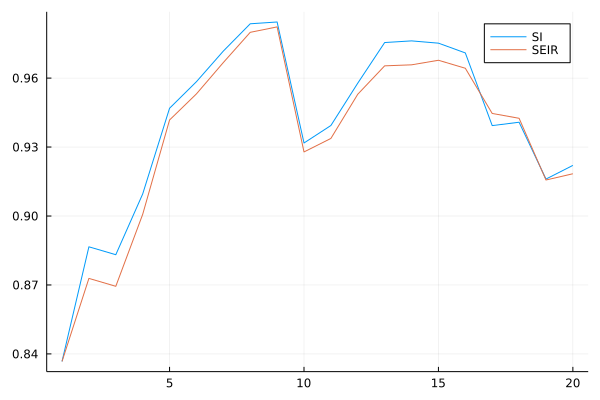

In [4]:
trial = 2
nob=1
plot(AUSI[nob,trial,:], label = "SI")
plot!(AUSEIR[nob,trial,:], label = "SEIR")

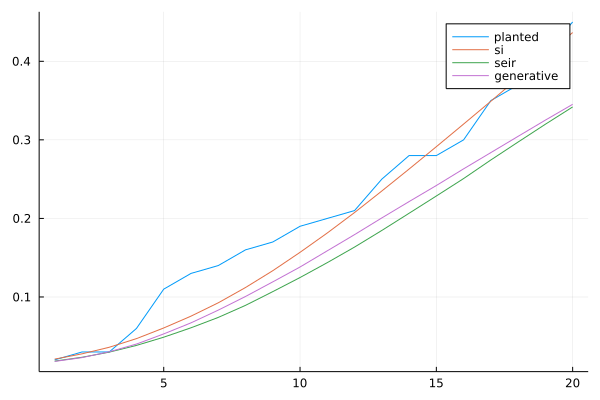

In [5]:
trial = 2
plot(planted[nob,trial,:], label = "planted")
plot!(n_si[nob,trial,:], label = "si")
plot!(n_seir[nob,trial,:], label = "seir")
plot!(gener[nob,trial,:], label = "generative")

In [6]:
SIErr = zeros(nobstot,T)
SEIRErr = zeros(nobstot,T)
n_siErr = zeros(nobstot,T)
n_seirErr = zeros(nobstot,T)
plantedErr = zeros(nobstot,T)
generErr = zeros(nobstot,T)
for nobs=1:nobstot
    SIErr[nobs,:]=[err(AUSI[nobs,:,t]) for t in 1:T]
    SEIRErr[nobs,:]=[err(AUSEIR[nobs,:,t]) for t in 1:T]
    n_siErr[nobs,:] = [err(n_si[nobs,:,t]) for t in 1:T]
    n_seirErr[nobs,:] = [err(n_seir[nobs,:,t]) for t in 1:T]
    plantedErr[nobs,:] = [err(planted[nobs,:,t]) for t in 1:T]
    generErr[nobs,:] = [err(gener[nobs,:,t]) for t in 1:T]
end

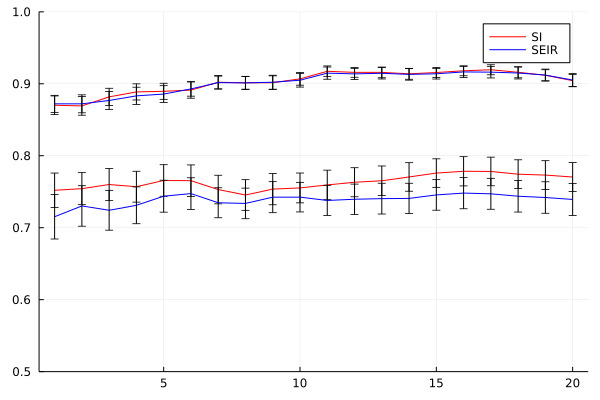

In [7]:
ob=1
plot(avg(AUSI[ob,:,:])', yerror=SIErr[ob,:], color="red", label="SI")
plot!(avg(AUSEIR[ob,:,:])',yerror=SEIRErr[ob,:], color="blue", label="SEIR")

ob=2
plot!(avg(AUSI[ob,:,:])', yerror=SIErr[ob,:], color="red", label=false)
plot!(avg(AUSEIR[ob,:,:])',yerror=SEIRErr[ob,:], color="blue", label=false)

ob=3
#plot!(avg(AUSI[ob,:,:])', yerror=SIErr[ob,:], color="red", label=false)
#plot!(avg(AUSEIR[ob,:,:])',yerror=SEIRErr[ob,:], color="blue", label=false)
ylims!(0.5,1)
#savefig("./ModelSelection/SEIRvsSI.pdf")


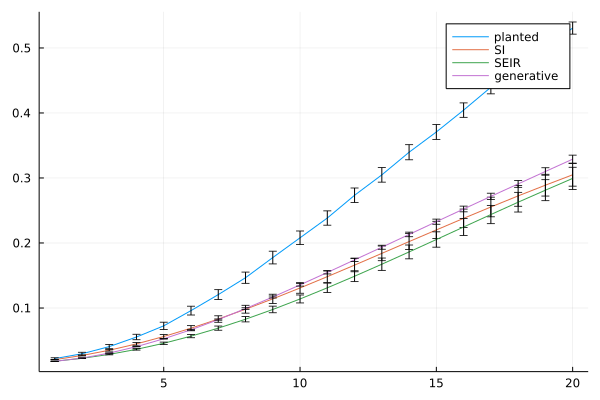

In [8]:
ob = 3
plot(avg(planted[ob,:,:])', yerror=plantedErr[ob,:], label="planted")
plot!(avg(n_si[ob,:,:])',yerror=n_siErr[ob,:], label="SI")
plot!(avg(n_seir[ob,:,:])',yerror=n_seirErr[ob,:], label="SEIR")
plot!(avg(gener[ob,:,:])',yerror=generErr[ob,:], label="generative")
#savefig("./ModelSelection/ninfSEIRvsSI.pdf")

In [9]:
#plot(avg(distance)', yerror = distErr)

## SimulatedGraphs Inference

In [175]:
try_max = 2
nobs_set = [1,2]
pahtstring = "./SimulatedGraphs/SimulatedGraphData/"
T = 20
AUcau = zeros(try_max,length(nobs_set),T)
AUsoft = zeros(try_max,length(nobs_set),T)
AUsib = zeros(try_max,length(nobs_set),T)
AUheu = zeros(try_max,length(nobs_set),T)
AUmh = zeros(try_max,length(nobs_set),T)
AUMF = zeros(try_max,length(nobs_set),T)
for trial = 1:try_max
    for r = 1:length(nobs_set) 
        nobs = nobs_set[r]
        AUcau[trial,r,:] = readdlm("$(pahtstring)try$(trial)nobs$(nobs)cau.txt") 
        AUsoft[trial,r,:] = readdlm("$(pahtstring)try$(trial)nobs$(nobs)soft.txt")
        AUsib[trial,r,:] = readdlm("$(pahtstring)try$(trial)nobs$(nobs)sib.txt")
        AUheu[trial,r,:] = readdlm("$(pahtstring)try$(trial)nobs$(nobs)fre.txt")
        AUmh[trial,r,:] = readdlm("$(pahtstring)try$(trial)nobs$(nobs)mc.txt")
        AUMF[trial,r,:] = readdlm("$(pahtstring)try$(trial)nobs$(nobs)mf.txt")
    end
end

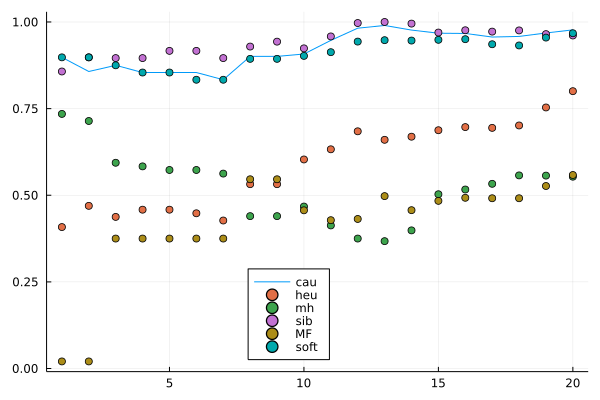

In [176]:
tr, obs = 1,2
plot(AUcau[tr,obs,:],label="cau")
scatter!(AUheu[tr,obs,:],label="heu")
scatter!(AUmh[tr,obs,:],label="mh")
scatter!(AUsib[tr,obs,:],label="sib")
scatter!(AUMF[tr,obs,:],label="MF")
scatter!(AUsoft[tr,obs,:],label="soft", legend = :bottom)

#ylims!(0.5,1.01)

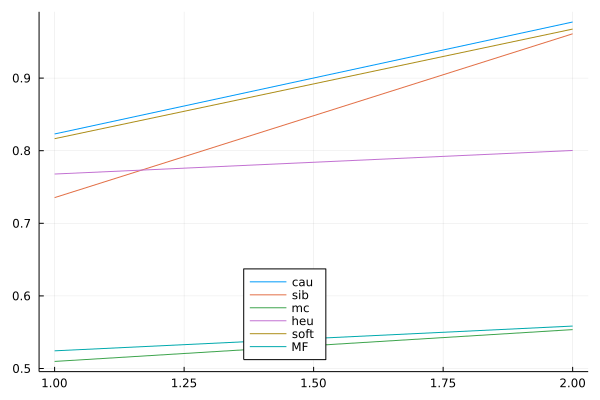

In [177]:
tr, time = 1 , T
plot(nobs_set,AUcau[tr,:,time],label="cau", legend=:bottom)
plot!(nobs_set,AUsib[tr,:,time], label = "sib")
plot!(nobs_set,AUmh[tr,:,time], label = "mc")
plot!(nobs_set,AUheu[tr,:,time], label = "heu")
plot!(nobs_set,AUsoft[tr,:,time], label="soft")
plot!(nobs_set,AUMF[tr,:,time], label="MF")

#savefig("../provaSoft")
#ylims!(0.5,1.01)

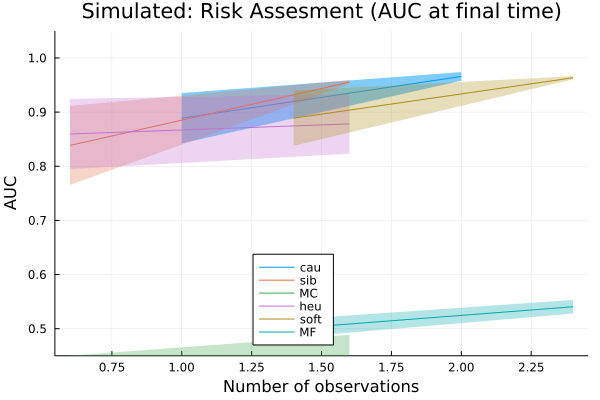

In [178]:
cauErr=[err(AUcau[:,r,end]) for r in 1:length(nobs_set)]
softErr=[err(AUsoft[:,r,end]) for r in 1:length(nobs_set)]
mhErr=[err(AUmh[:,r,end]) for r in 1:length(nobs_set)]
sibErr=[err(AUsib[:,r,end]) for r in 1:length(nobs_set)]
heuErr=[err(AUheu[:,r,end]) for r in 1:length(nobs_set)]
mfErr=[err(AUMF[:,r,end]) for r in 1:length(nobs_set)]

plot(nobs_set,avg(AUcau[:,:,end])',ribbon=cauErr,fillalpha=0.5,label="cau",title="Simulated: Risk Assesment (AUC at final time)")
plot!(nobs_set .- 0.4,avg(AUsib[:,:,end])',ribbon=sibErr,fillalpha=0.3,label="sib",xlabel="Number of observations")
plot!(nobs_set .- 0.4,avg(AUmh[:,:,end])',ribbon=mhErr,fillalpha=0.3,label="MC",ylabel="AUC",legend=:bottom)
plot!(nobs_set .- 0.4,avg(AUheu[:,:,end])',ribbon=heuErr,fillalpha=0.3,label="heu")
plot!(nobs_set .+ 0.4,avg(AUsoft[:,:,end])',ribbon=softErr,fillalpha=0.3,label="soft")
plot!(nobs_set .+ 0.4,avg(AUMF[:,:,end])',ribbon=mfErr,fillalpha=0.3,label="MF")
ylims!(0.45,1.05)
#savefig("./SimulatedGraphs/SimulatedGraphPictures/RiskAssesment")

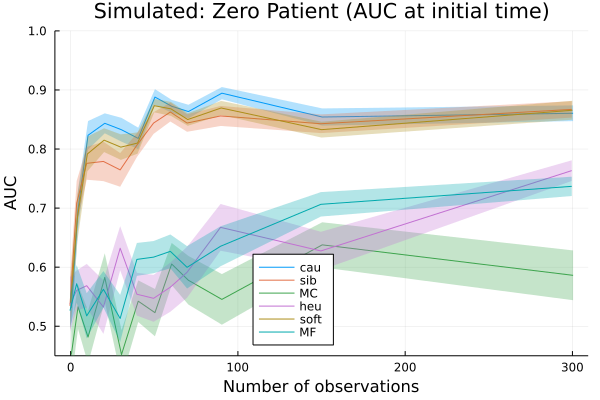

In [14]:
cauErr=[err(AUcau[:,r,1]) for r in 1:length(nobs_set)]
softErr=[err(AUsoft[:,r,1]) for r in 1:length(nobs_set)]
mhErr=[err(AUmh[:,r,1]) for r in 1:length(nobs_set)]
sibErr=[err(AUsib[:,r,1]) for r in 1:length(nobs_set)]
heuErr=[err(AUheu[:,r,1]) for r in 1:length(nobs_set)]
mfErr=[err(AUMF[:,r,1]) for r in 1:length(nobs_set)]

plot(nobs_set .+ 0.4,avg(AUcau[:,:,1])',ribbon=cauErr,fillalpha=0.3,label="cau",title="Simulated: Zero Patient (AUC at initial time)")
plot!(nobs_set .- 0.4,avg(AUsib[:,:,1])',ribbon=sibErr,fillalpha=0.3,label="sib",xlabel="Number of observations")
plot!(nobs_set .+ 0.4,avg(AUmh[:,:,1])',ribbon=mhErr,fillalpha=0.3,label="MC",ylabel="AUC",legend=:bottom)
plot!(nobs_set .- 0.4,avg(AUheu[:,:,1])',ribbon=heuErr,fillalpha=0.3,label="heu")
plot!(nobs_set .+ 0,avg(AUsoft[:,:,1])',ribbon=softErr,fillalpha=0.3,label="soft")
plot!(nobs_set .- 0.4,avg(AUMF[:,:,1])',ribbon=mfErr,fillalpha=0.3,label="MF")
ylims!(0.45,1)
#savefig("./SimulatedGraphs/SimulatedGraphPictures/ZeroPatient")

## Real Graph Inference (Hospitals)

In [32]:
try_max = 15
nobs_set = [10, 25, 40, 80, 160, 300]

T = 20
AUcau = zeros(try_max,length(nobs_set),T)
AUsoft = zeros(try_max,length(nobs_set),T)
AUsib = zeros(try_max,length(nobs_set),T)
AUheu = zeros(try_max,length(nobs_set),T)
AUmh = zeros(try_max,length(nobs_set),T)
for trial = 1:try_max
    for r = 1:length(nobs_set) 
        nobs = nobs_set[r]
        AUcau[trial,r,:] = readdlm("./RealGraph/RealGraphData4/try$(trial)nobs$(nobs)cau.txt") 
        AUsoft[trial,r,:] = readdlm("./RealGraph/RealGraphData4/try$(trial)nobs$(nobs)soft.txt")
        AUsib[trial,r,:] = readdlm("./RealGraph/RealGraphData4/try$(trial)nobs$(nobs)sib.txt")
        AUheu[trial,r,:] = readdlm("./RealGraph/RealGraphData4/try$(trial)nobs$(nobs)fre.txt")
        AUmh[trial,r,:] = readdlm("./RealGraph/RealGraphData4/try$(trial)nobs$(nobs)mc.txt")
    end
end

LoadError: InterruptException:

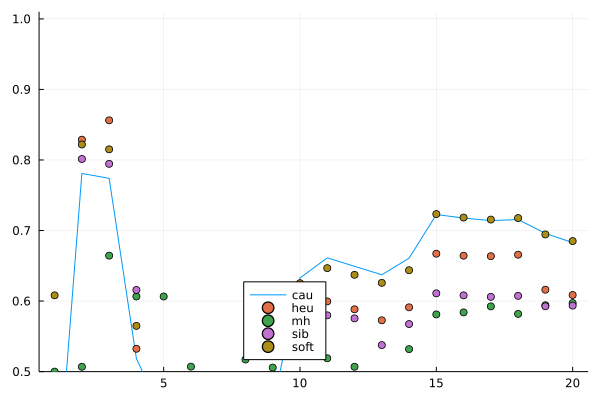

In [33]:
tr, obs = 4,1
plot(AUcau[tr,obs,:],label="cau")
scatter!(AUheu[tr,obs,:],label="heu")
scatter!(AUmh[tr,obs,:],label="mh")
scatter!(AUsib[tr,obs,:],label="sib")
scatter!(AUsoft[tr,obs,:],label="soft", legend = :bottom)

ylims!(0.5,1.01)

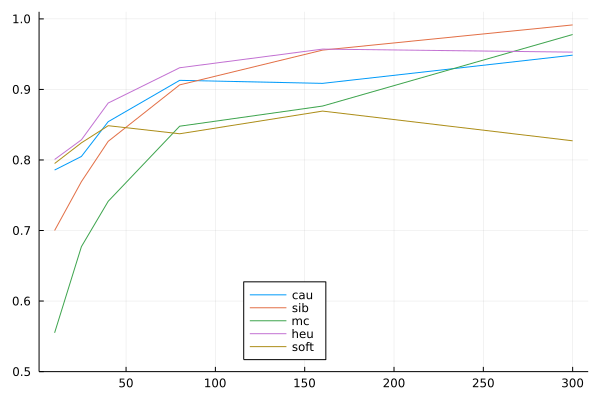

In [15]:
tr, time = 3 , T
plot(nobs_set,AUcau[tr,:,time],label="cau", legend=:bottom)
plot!(nobs_set,AUsib[tr,:,time], label = "sib")
plot!(nobs_set,AUmh[tr,:,time], label = "mc")
plot!(nobs_set,AUheu[tr,:,time], label = "heu")
plot!(nobs_set,AUsoft[tr,:,time], label="soft")

#savefig("../provaSoft.pdf")
ylims!(0.5,1.01)

In [16]:
function avg(AU, dims=1)
    sum(AU,dims=dims)/size(AU,dims)
end

function err(vec)
    sqrt(sum((vec .- avg(vec)) .^ 2 ) / length(vec)^2)
end

err (generic function with 1 method)

In [17]:
err(AUcau[:,1,1])

0.05454401328251281

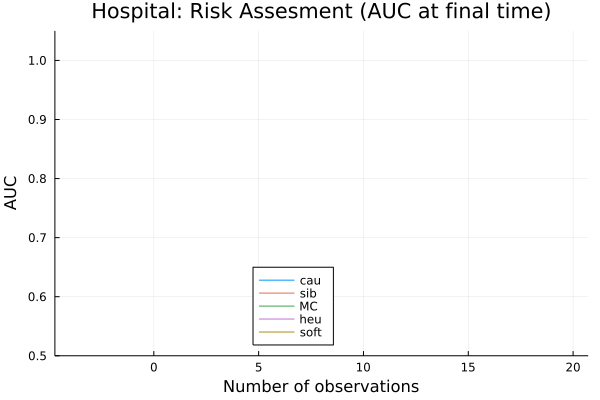

In [10]:
function avg(AU, dims=1)
    sum(AU,dims=dims)/size(AU,dims)
end

function err(vec)
    sqrt(sum((vec .- avg(vec)) .^ 2 ) / length(vec)^2)
end

cauErr=[err(AUcau[:,r,end]) for r in 1:length(nobs_set)]
softErr=[err(AUsoft[:,r,end]) for r in 1:length(nobs_set)]
mhErr=[err(AUmh[:,r,end]) for r in 1:length(nobs_set)]
sibErr=[err(AUsib[:,r,end]) for r in 1:length(nobs_set)]
heuErr=[err(AUheu[:,r,end]) for r in 1:length(nobs_set)]

plot(nobs_set,avg(AUcau[:,:,end])',yerror=cauErr,label="cau",title="Hospital: Risk Assesment (AUC at final time)")
plot!(nobs_set .+ 2,avg(AUsib[:,:,end])',yerror=sibErr,label="sib",xlabel="Number of observations")
plot!(nobs_set .- 2,avg(AUmh[:,:,end])',yerror=mhErr,label="MC",ylabel="AUC",legend=:bottom)
plot!(nobs_set .- 4,avg(AUheu[:,:,end])',yerror=heuErr,label="heu")
plot!(nobs_set .+ 5,avg(AUsoft[:,:,end])',yerror=softErr,label="soft")
ylims!(0.5,1.05)

In [19]:
plot(nobs_set,avg(AUcau[:,:,end])',yerror=cauErr,label="cau",title="Hospital: Risk Assesment (AUC at final time)")
plot!(nobs_set .+ 2,avg(AUsib[:,:,end])',yerror=sibErr,label="sib",xlabel="Number of observations")
plot!(nobs_set .- 2,avg(AUmh[:,:,end])',yerror=mhErr,label="MC",ylabel="AUC",legend=:bottom)
plot!(nobs_set .- 4,avg(AUheu[:,:,end])',yerror=heuErr,label="heu")
plot!(nobs_set .+ 5,avg(AUsoft[:,:,end])',yerror=softErr,label="soft")
ylims!(0.5,1.05)
savefig("./RealGraph/RealGraphPictures/RiskAssesment.pdf")

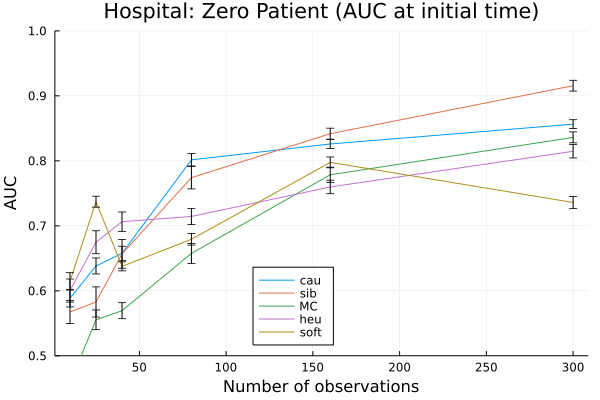

In [20]:
plot(nobs_set,avg(AUcau[:,:,1])',yerror=cauErr,label="cau",title="Hospital: Zero Patient (AUC at initial time)")
plot!(nobs_set,avg(AUsib[:,:,1])',yerror=sibErr,label="sib",xlabel="Number of observations")
plot!(nobs_set,avg(AUmh[:,:,1])',yerror=mhErr,label="MC",ylabel="AUC",legend=:bottom)
plot!(nobs_set,avg(AUheu[:,:,1])',yerror=heuErr,label="heu")
plot!(nobs_set,avg(AUsoft[:,:,1])',yerror=softErr,label="soft")
ylims!(0.5,1)
#savefig("./RealGraph/RealGraphPictures/ZeroPatient.pdf")

## Hyperparameters Inference

In [7]:
d1=readdlm("./Hyperparams/descent.txt")
d2=readdlm("./Hyperparams/descent2.txt")
d3=readdlm("./Hyperparams/descent3.txt")
d4=readdlm("./Hyperparams/descent4.txt")
d5=readdlm("./Hyperparams/descent5.txt")
fe=readdlm("./Hyperparams/hyperparams.txt");

In [66]:
minimum(fe)

18.48970040559143

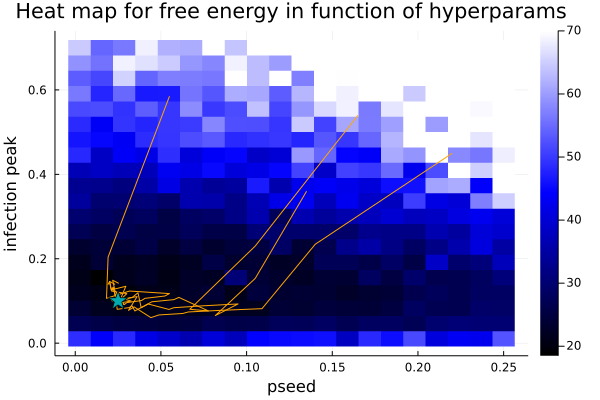

In [167]:
heatmap(LinRange(1/400,0.25,20),LinRange(0.01,0.7,20),fe', xlabel="pseed", c = [:black,:blue,:white],clim=(minimum(fe),70),ylabel="infection peak",title="Heat map for free energy in function of hyperparams")
plot!(d1[1:10:end,1],d1[1:10:end,2],c=:orange)
plot!(d2[1:10:end,1],d2[1:10:end,2],c=:orange)
plot!(d3[1:10:end,1],d3[1:10:end,2],c=:orange)
plot!(d4[1:10:end,1],d4[1:10:end,2],c=:orange)
#plot!(d5[1:10:end,1],d5[1:10:end,2],c=:orange)
#=scatter!([d1[end,1]],[d1[end,2]])
scatter!([d2[end,1]],[d2[end,2]])
scatter!([d3[end,1]],[d3[end,2]])
scatter!([d4[end,1]],[d4[end,2]],legend=false)=#
#scatter!([d5[end,1]],[d5[end,2]],legend=false)
scatter!([1/40,],[0.1],label="True",shape=:star,markersize=10,legend=false)
#savefig("./Hyperparams/Hyperdescent.pdf")    

In [160]:
d1[:,1]

200-element Vector{Float64}:
 0.135
 0.14850000000000002
 0.13365000000000002
 0.147015
 0.1323135
 0.14554485
 0.130990365
 0.1178913285
 0.10610219565000001
 0.09549197608500001
 0.10504117369350002
 0.09453705632415002
 0.08508335069173502
 ⋮
 0.019243815394373708
 0.01731943385493634
 0.019051377240429972
 0.02095651496447297
 0.018860863468025672
 0.016974777121223104
 0.018672254833345416
 0.016805029350010874
 0.01848553228501196
 0.020334085513513157
 0.01830067696216184
 0.020130744658378025

## Hyperparams Comparison

In [18]:
fe_cau=readdlm("./Hyperparams/hyper_fe_cau.txt")
fe_soft=readdlm("./Hyperparams/hyper_fe_soft.txt");
fe_Ssoft=readdlm("./Hyperparams/hyper_fe_Ssoft.txt");

In [19]:
heatmap(LinRange(1/400,0.25,20),LinRange(0.01,0.7,20),log.(fe_cau), xlabel="pseed", ylabel="infection peak")
scatter!([1/40],[0.1],label="True")
savefig("./Hyperparams/HyperCauF.pdf")

In [20]:
heatmap(LinRange(1/400,0.25,20),LinRange(0.01,0.7,20),log.(fe_soft), xlabel="pseed", ylabel="infection peak")
scatter!([1/40],[0.1],label="True")
savefig("./Hyperparams/HyperSoftF.pdf")

In [21]:
heatmap(LinRange(1/400,0.25,20),LinRange(0.01,0.7,20),log.(fe_Ssoft), xlabel="pseed", ylabel="infection peak")
scatter!([1/40],[0.1],label="True")
savefig("./Hyperparams/HyperSSoftF.pdf")